<img src='https://kaggle2.blob.core.windows.net/datasets-images/5227/7876/3d18388d350d2791f4121a232acce097/dataset-cover.jpg?t=2017-11-24-13-55-38'>

>The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

>>longitude

>>latitude

>>housing_median_age

>>total_rooms

>>total_bedrooms

>>population

>>households


>>median_income

>>median_house_value

>>ocean_proximity

<h3 }>The aim is to predict the median house price value for each district</h3>

### Importing libraires and resources

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import cross_val_score
import  statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.decomposition import  PCA
from sklearn.cluster import  KMeans

%matplotlib inline


the number of rows and colums are(20640, 10)

the columns are - 

longitude.	
latitude.	
housing_median_age.	
total_rooms.	
total_bedrooms.	
population.	
households.	
median_income.	
median_house_value.	
ocean_proximity.	


[None, None, None, None, None, None, None, None, None, None]

### Importing data 

In [6]:
#importing data
df=pd.read_csv('housing.csv')
df




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


> we can see that median house values are continuous and hence its a regression problem

>we have onne categorical feature (ocean_proximity)

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Missing Values
- here yellow stripes shows that 'total bedroooms feature is  having  missing values of frequency= 207

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [78]:


df.isnull().sum()
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

plt.title('missing data')
plt.show()

>statistics for missing value feature
- average is 537 for total bedrooms
- first quartile is highly low compared to other two

In [9]:
#statistics of missing values column
df['total_bedrooms'].describe()




count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [80]:
plt.figure(figsize=(10,4))
plt.hist(df[df['total_bedrooms'].notnull()]['total_bedrooms'],bins=20,color='green')#histogram of totalbedrooms
#data has some outliers
(df['total_bedrooms']>4000).sum()
plt.title('frequency historgram')
plt.xlabel('total bedrooms')
plt.ylabel('frequency')

The data has too much outliers and hence filling with mean will affect the prediction

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

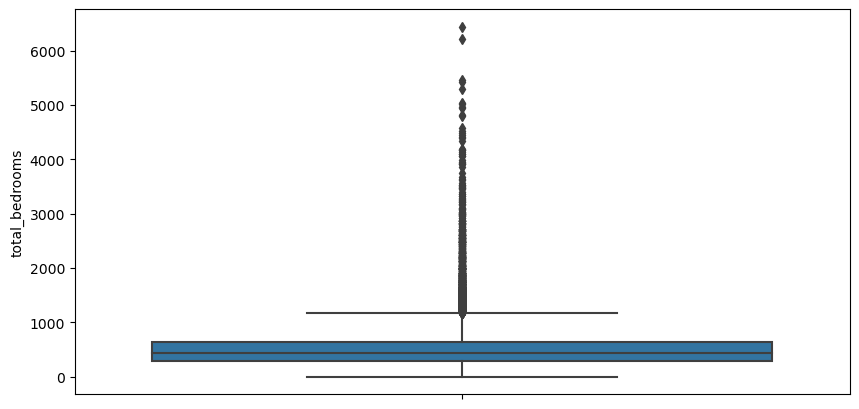

In [10]:
# boxplot on total_bedrooms
plt.figure(figsize=(10,5))
sns.boxplot(y='total_bedrooms',data=df)
plt.plot

> since there are alot of outliers hence we should use median to fill missing values

#### we can fill missing values according to a categorical column
#### ocean_proximity is the categorical column

In [11]:


#we will calculate the median for total_bedrooms based  upon categories of ocean_proximity column
def calc_categorical_median(x):
    """this function fill the missing values of total_bedrooms based upon categories of ocean_proximity"""
    unique_colums_ocean_proximity=x['ocean_proximity'].unique()
    for i in unique_colums_ocean_proximity:
        median=x[x['ocean_proximity']==i]['total_bedrooms'].median()
        x.loc[x['ocean_proximity']==i,'total_bedrooms'] =  x[x['ocean_proximity']==i]['total_bedrooms'].fillna(median)
calc_categorical_median(df)





In [12]:
#checking missing values again
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [13]:
#dtypes
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


# EDA
>statistics of each column

In [14]:

df.describe()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.852229,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.390765,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [86]:
# sns.pairplot(df)

##### histogram of dependent feature


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


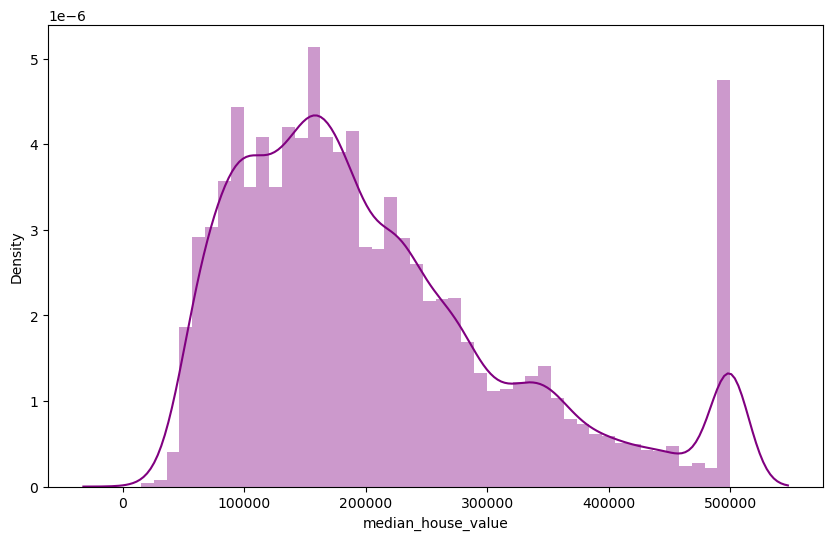

In [15]:
#we can see that area where median price frequencey for >= 500000 is more and could be a outlier or wrong data

plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'],color='purple')
plt.show()


[]

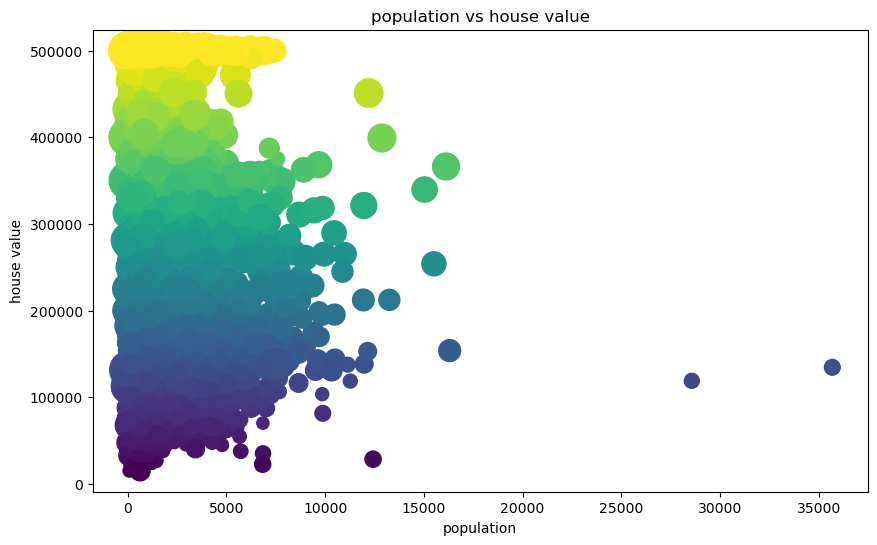

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(df['population'],df['median_house_value'],c=df['median_house_value'],s=df['median_income']*50)
plt.colorbar
plt.title('population vs house value' )
plt.xlabel('population')
plt.ylabel('house value')
plt.plot()

> ### Removing outliers

In [17]:
df[df['median_house_value']>450000]['median_house_value'].value_counts().head()


500001.0    965
500000.0     27
475000.0      8
483300.0      6
466700.0      4
Name: median_house_value, dtype: int64

In [19]:
df=df.loc[df['median_house_value']<500001,:]

In [20]:
df=df[df['population']<25000]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


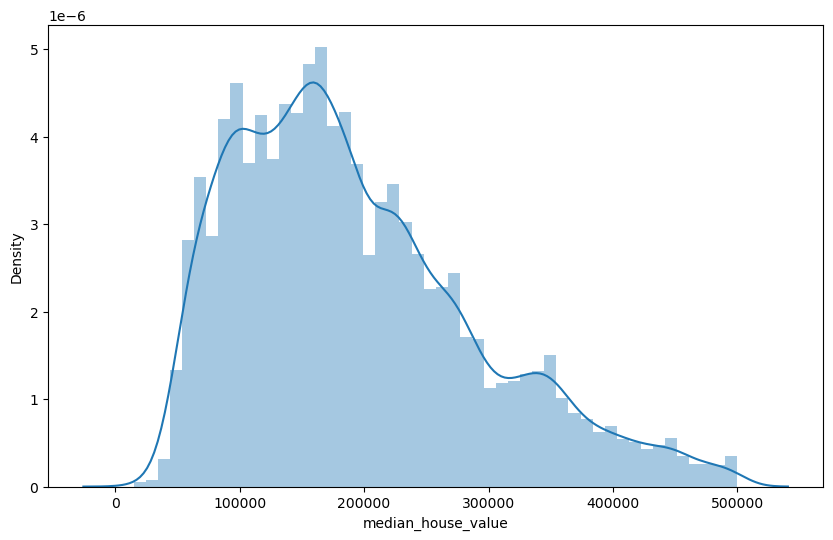

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'])
plt.show()

>scatter plot on co-ordinates(latitude and longitude)

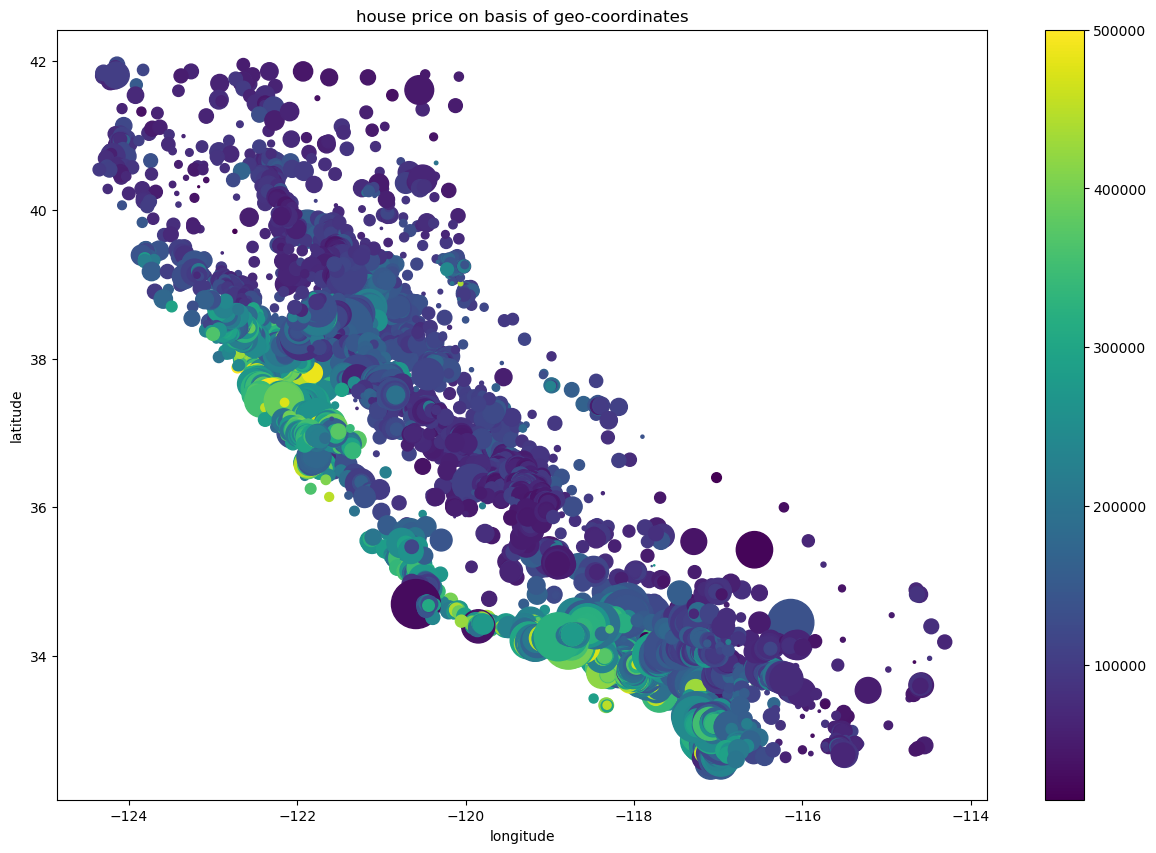

In [22]:

plt.figure(figsize=(15,10))
plt.scatter(df['longitude'],df['latitude'],c=df['median_house_value'],s=df['population']/10,cmap='viridis')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('house price on basis of geo-coordinates')
plt.show()

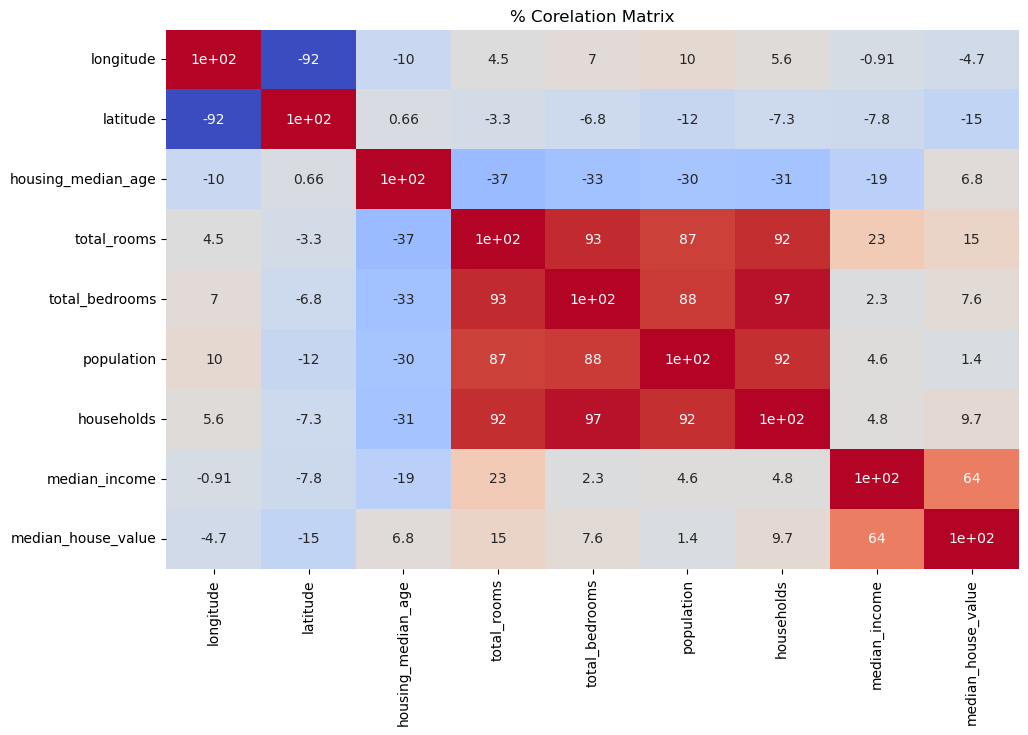

In [23]:
#corelation matrix
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=df.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()


[]

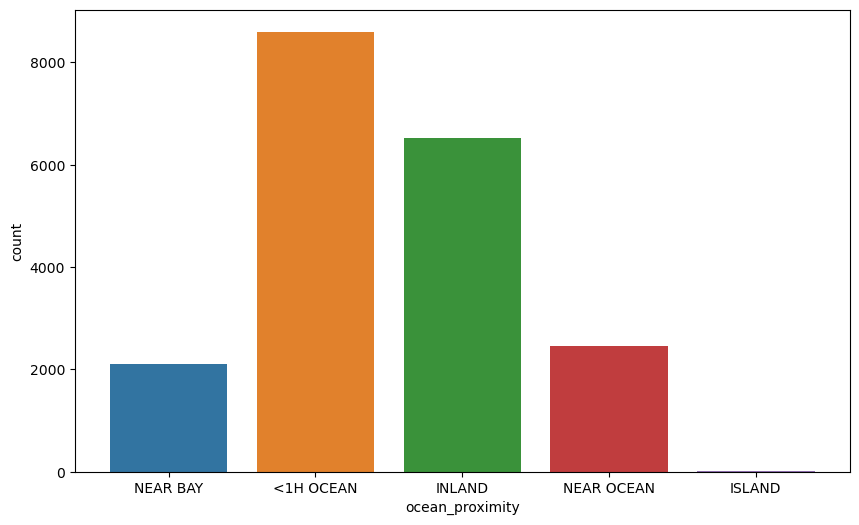

In [24]:
#barplot on ocean_proximity categories
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='ocean_proximity')
plt.plot()

[]

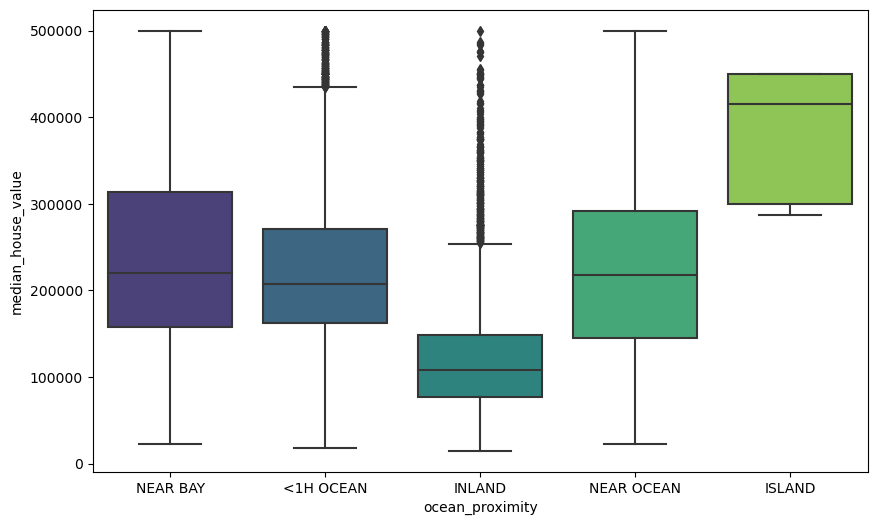

In [25]:
#boxplot of house value on ocean_proximity categories
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()

#### kernel density estimation of ocean_proximity vs median_house_value


In [26]:
# plt.figure(figsize=(10,6))
# sns.kdeplot(df['median_house_value'],df['median_income'],cmap='viridis',cbar=True)

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

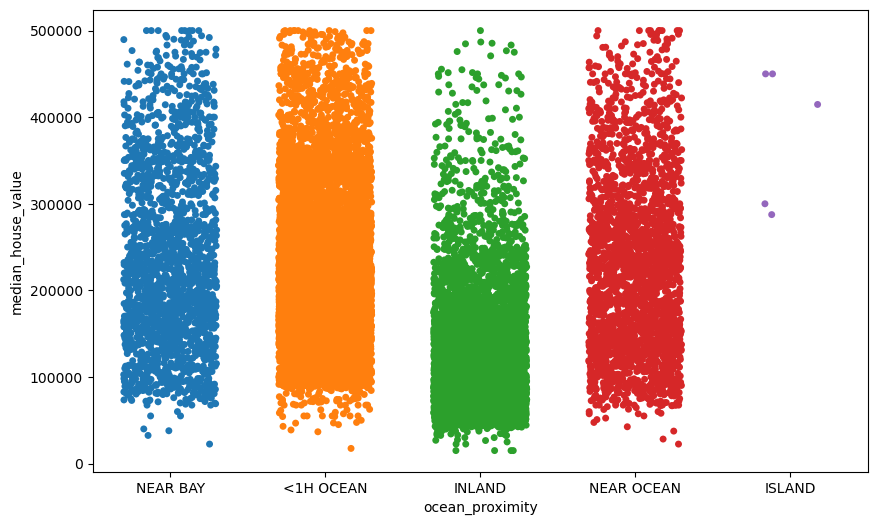

In [27]:
plt.figure(figsize=(10,6))

sns.stripplot(data=df,x='ocean_proximity',y='median_house_value',jitter=0.3)

#'INLAND CATERGORY  IN cean_proximity COLUMN  I

## preprocessing


#### Feature Selection

In [28]:
# converting ocean_proximity to dummies
df=pd.concat([pd.get_dummies(df['ocean_proximity'],drop_first=True),df],axis=1).drop('ocean_proximity',axis=1)
df['income per working population']=df['median_income']/(df['population']-df['households'])
df['bed per house']=df['total_bedrooms']/df['total_rooms']
df['h/p']=df['households']/df['population']


In [100]:

def type_building(x):
    if x<=10:
        return "new"
    elif x<=30:
        return 'mid old'
    else:
        return 'old'
df=pd.concat([df,pd.get_dummies(df['housing_median_age'].apply(type_building),drop_first=True)],axis=1)

In [29]:
x=df.drop('median_house_value',axis=1).values
y=df['median_house_value'].values

#### Tranning and Testing sampling

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

### Normalising data 

In [31]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
xtrain=ms.fit_transform(xtrain)
xtest=ms.transform(xtest)

## Feature Dimentional Reduction and Visualization


## Visualising data using PCA


In [32]:
def c_variance(x):
    total=0
    clist=[]
    for i in np.arange(0,xtrain.shape[1]):
        p=PCA(n_components=i+1)
        p.fit(x)
        total=total+p.explained_variance_ratio_[i]
        clist.append(total)
        
    return clist
x_train_variance=list(map(lambda x:x*100,c_variance(xtrain)))

### Comulative Variance Curve

Text(0.5, 1.0, 'comulative variance ratio of p.c.a components')

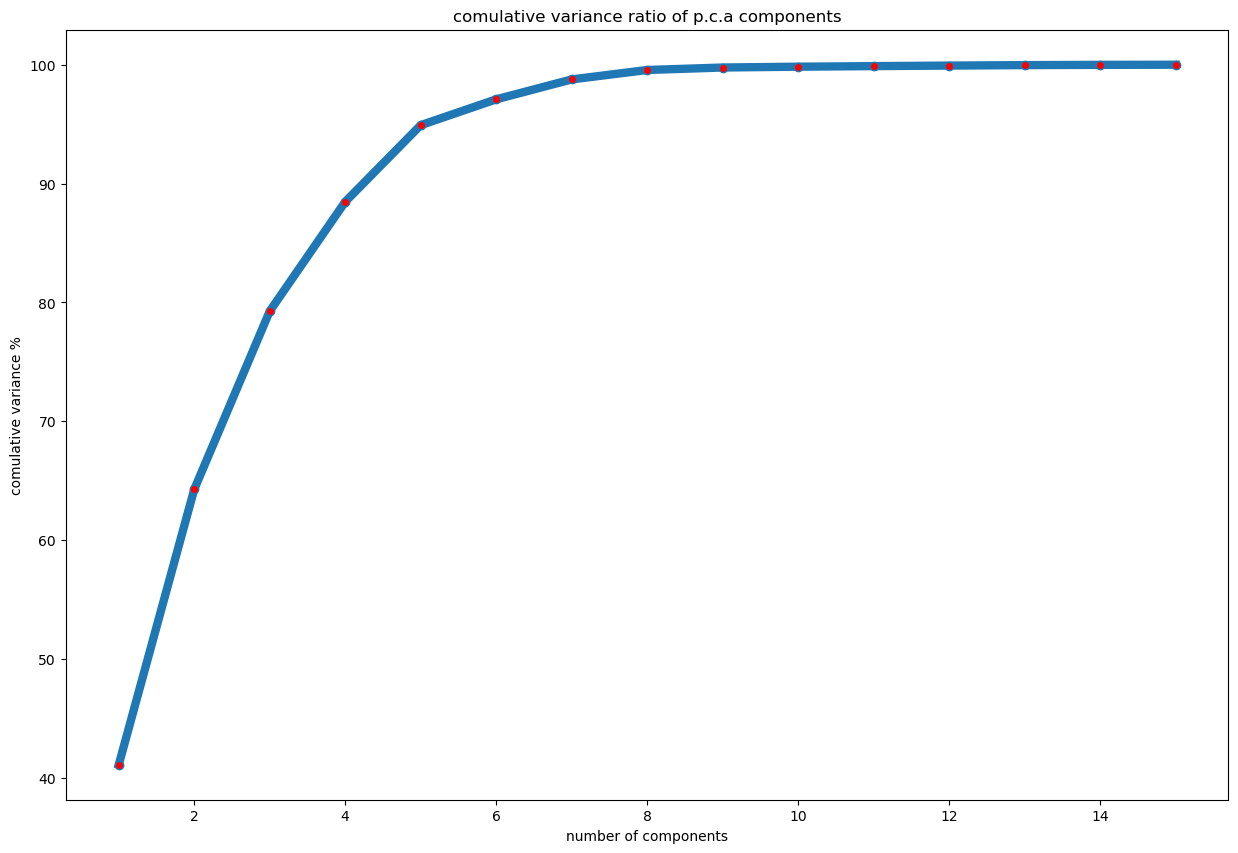

In [33]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(1,xtrain.shape[1]+1),x_train_variance,marker='o',markerfacecolor='red',lw=6)
plt.xlabel('number of components')
plt.ylabel('comulative variance %')
plt.title('comulative variance ratio of p.c.a components')


> here  we can see that with 2 principle components we get 54% variance

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


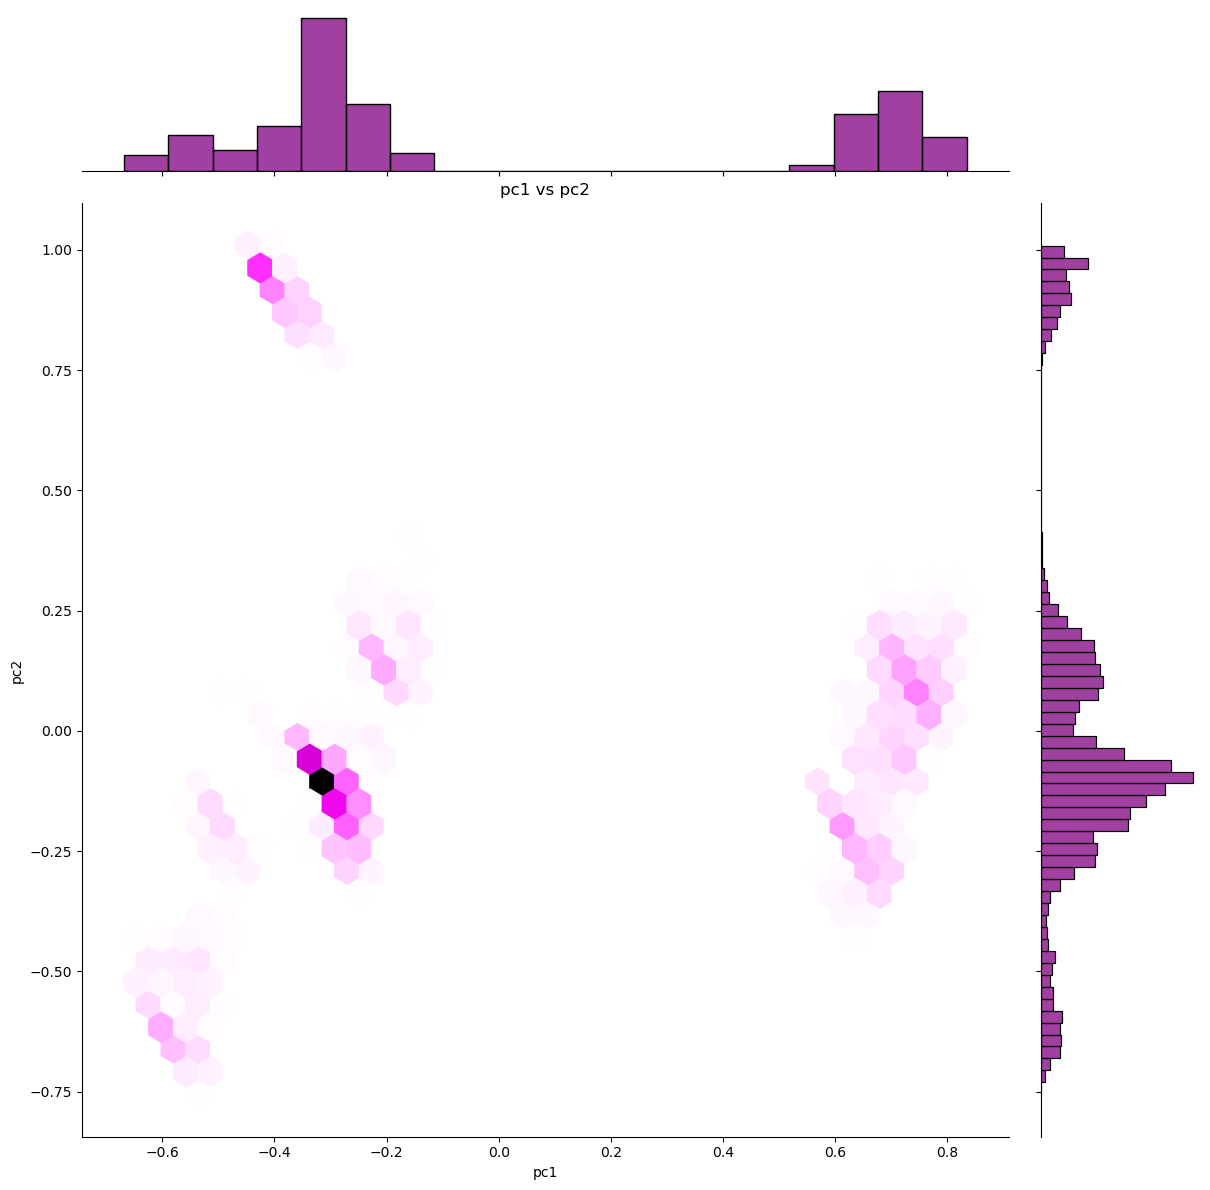

In [34]:
pca=PCA(n_components=2)
pca.fit(xtrain)
sns.jointplot(data={'pc1':pca.fit_transform(xtrain)[:,0],'pc2':pca.fit_transform(xtrain)[:,1]},x='pc1',y='pc2',size=12,kind='hex',color='purple')
plt.title('pc1 vs pc2')
plt.show()

## Clustering first two principle components
> applying K means

In [35]:
p_train=pca.fit_transform(xtrain)


In [36]:
best=[]
for i in range(1,10):
    k=KMeans(n_clusters=i)
    k.fit(xtrain)
    best.append(k.inertia_)
    

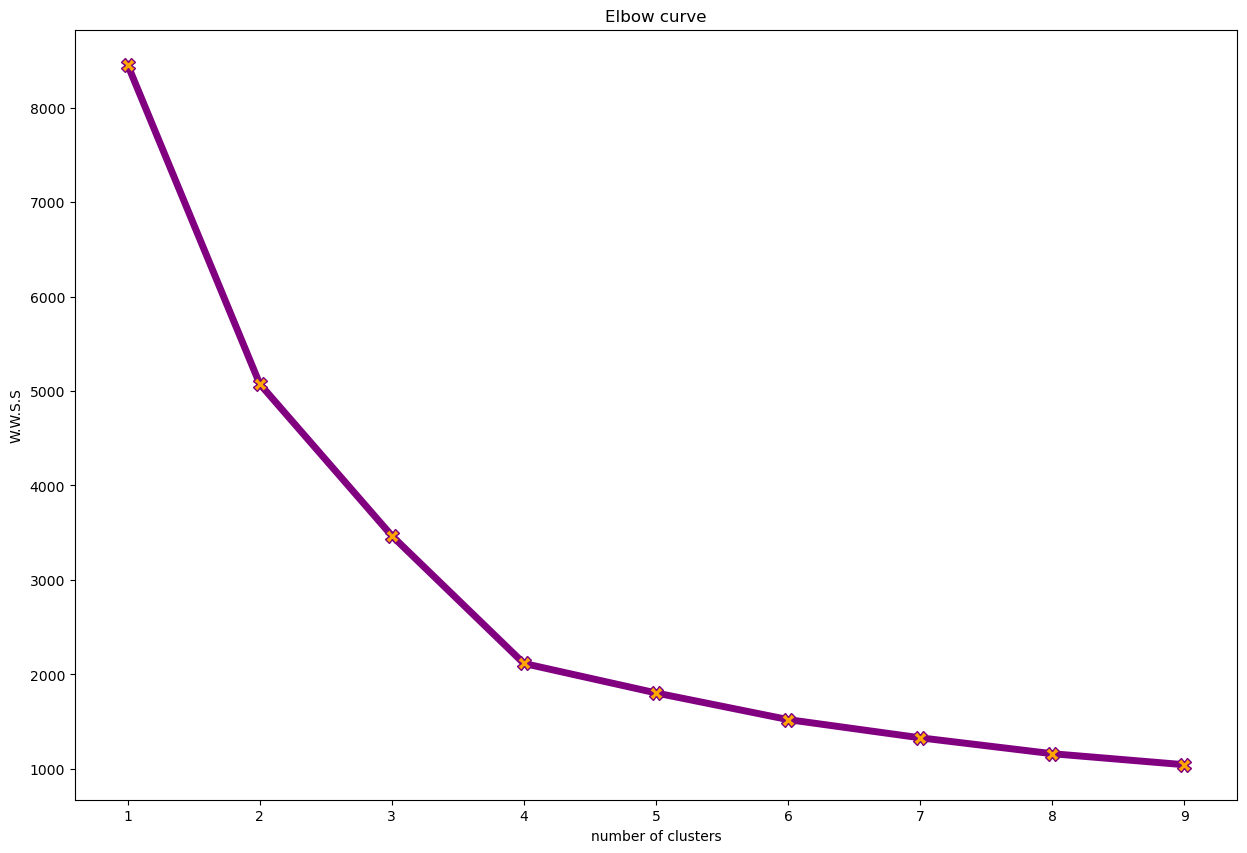

In [37]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(1,len(best)+1),best,marker='X',markerfacecolor='orange',markersize=10,lw=5,color='purple')
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('W.W.S.S')
plt.show()

 Here we can see that 3  is the most optimal number of clusters

In [110]:
k=KMeans(n_clusters=4)
kpred=k.fit_predict(xtrain)

In [38]:
plt.figure(figsize=(15,12))
color=['red','green','blue','pink']
for i in range(3):
    plt.scatter(p_train[kpred==i][:,0],p_train[kpred==i][:,1],c=color[i])
    plt.scatter(k.cluster_centers_[i,0],k.cluster_centers_[i,1],c='yellow',marker='x')
    plt.xlabel('pc1')
    plt.ylabel('pc2')

NameError: name 'kpred' is not defined

<Figure size 1500x1200 with 0 Axes>

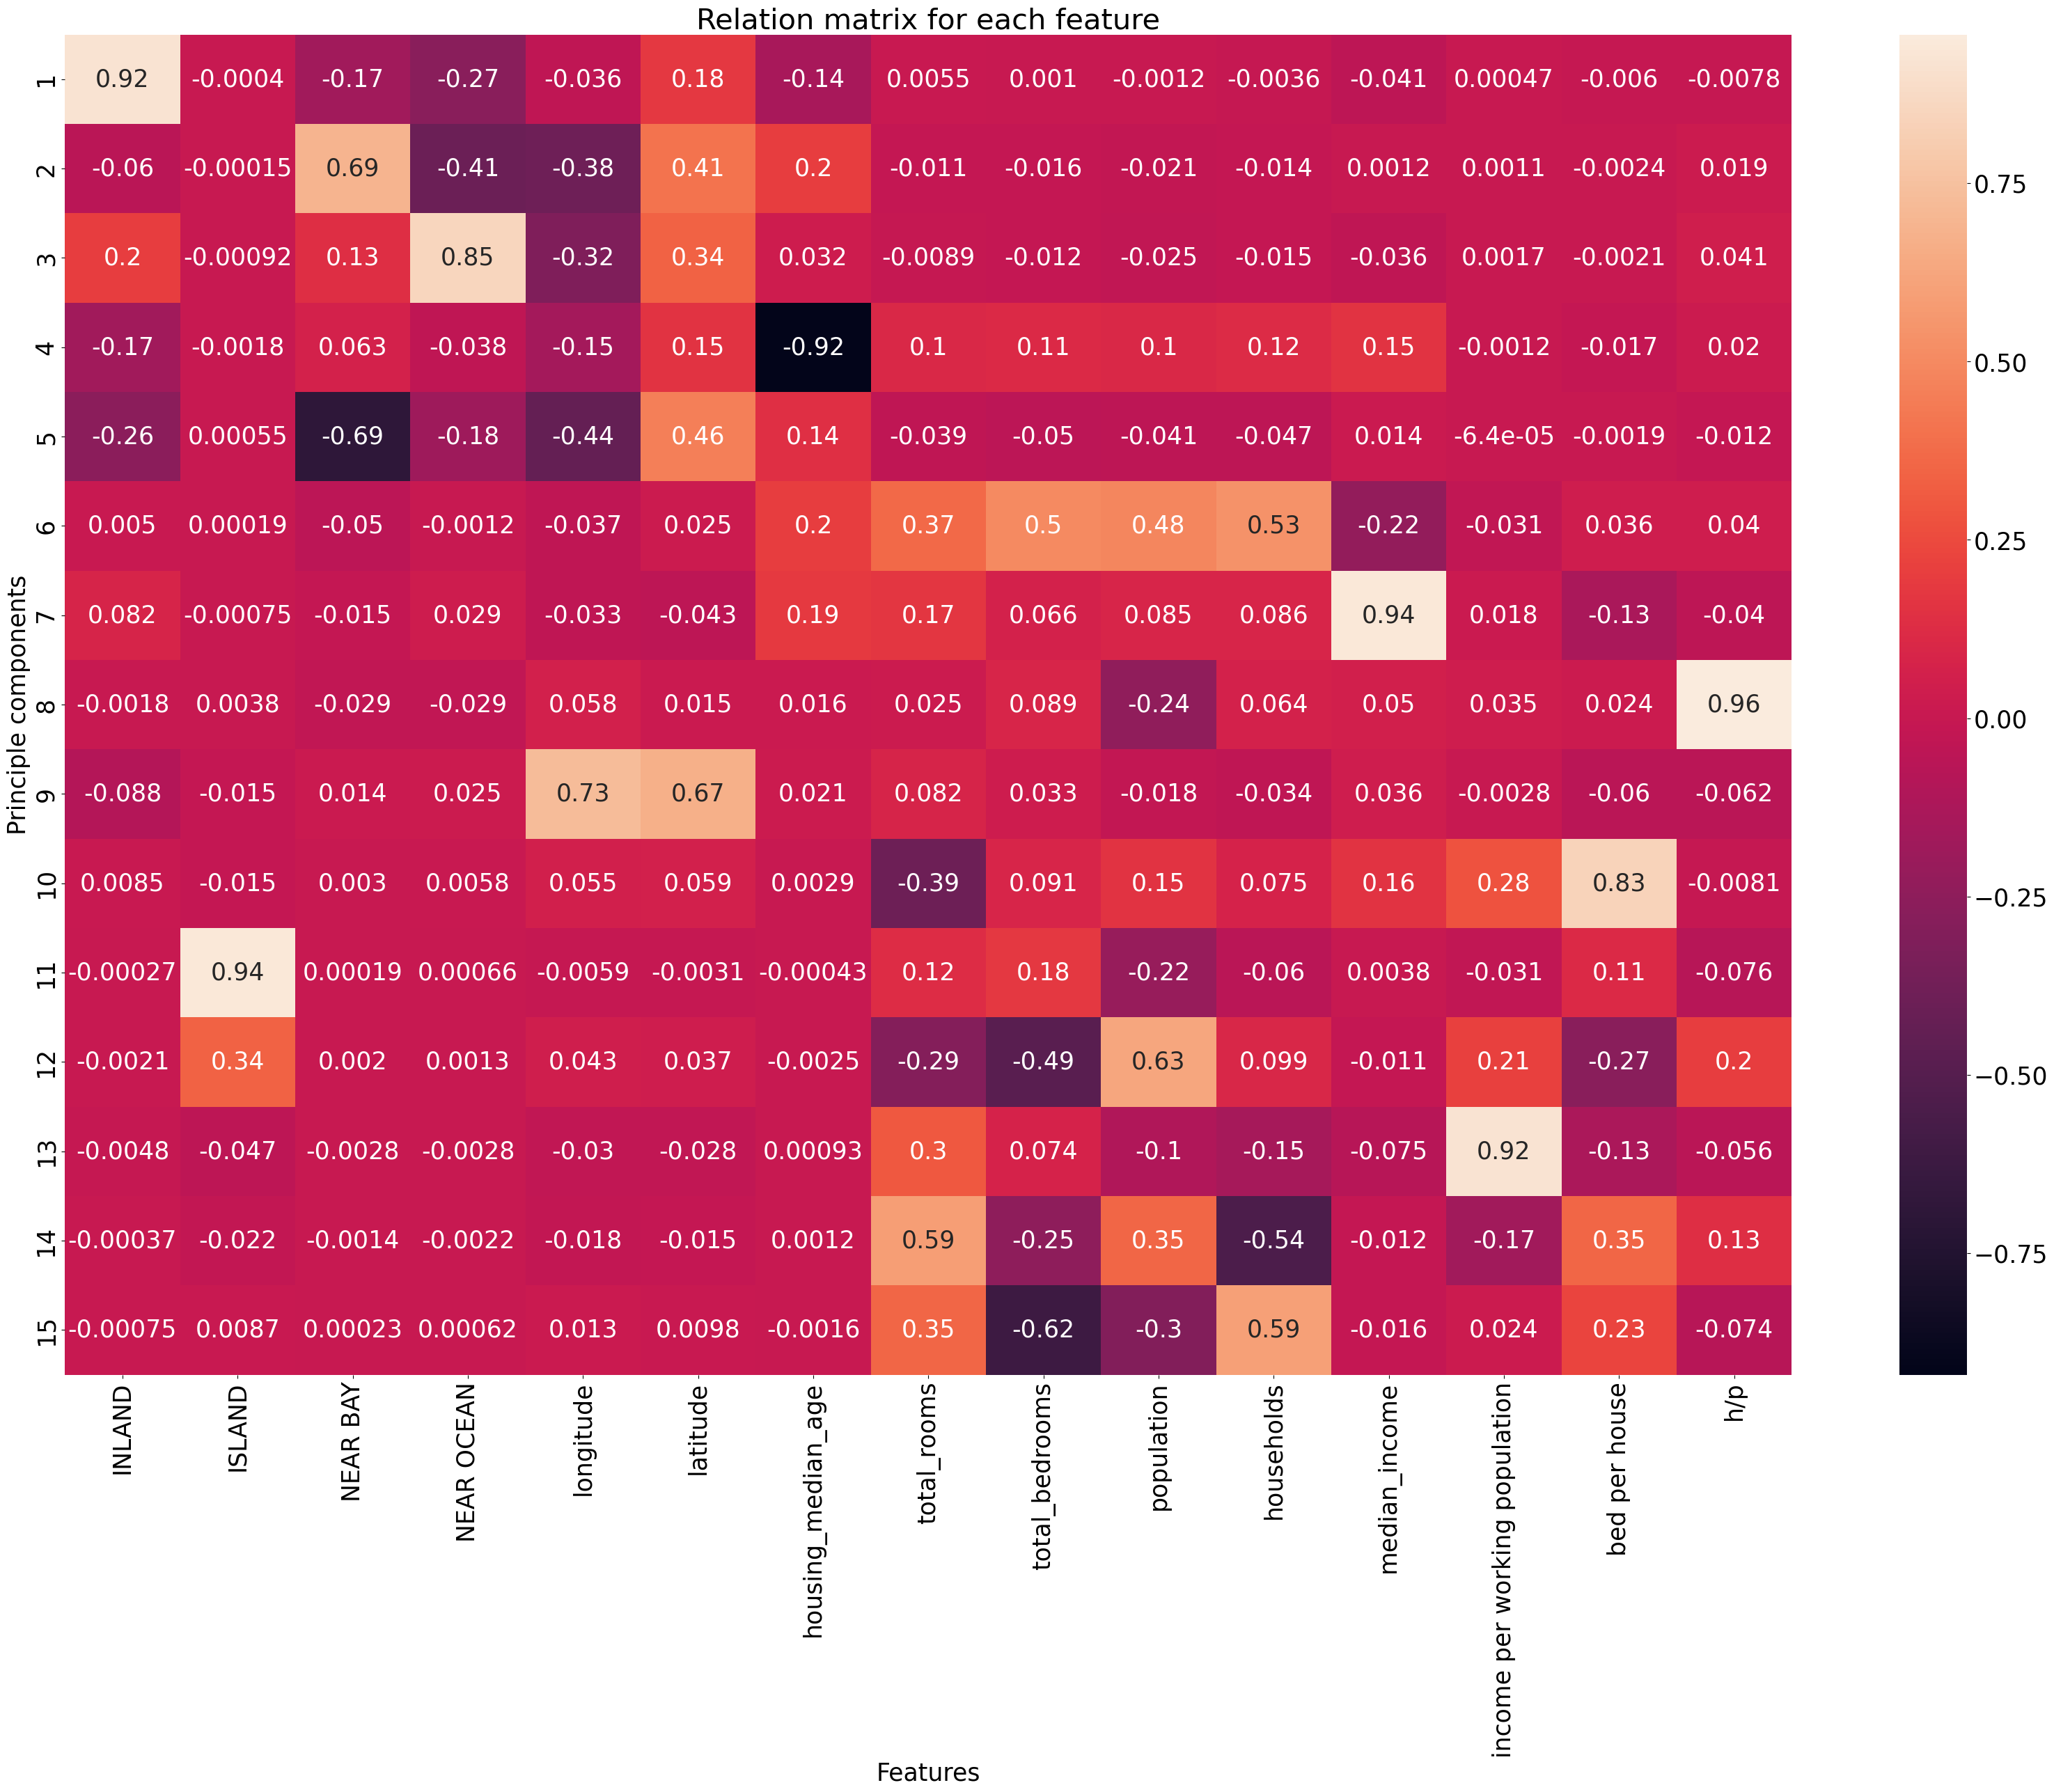

In [39]:
matplotlib.rcParams.update({'font.size': 25})
pca=PCA(n_components=None)
pca.fit(xtrain)
plt.figure(figsize=(40,25))
sns.heatmap(pca.components_,annot=True,xticklabels=df.drop('median_house_value',axis=1).columns,yticklabels=[str(i) for i in range(1,len(df.columns))])
plt.xlabel('Features')
plt.ylabel('Principle components')
plt.title('Relation matrix for each feature')
plt.show()
matplotlib.rcParams.update({'font.size': 12})

# Modelling

### Linear regression  with most corelated features

In [42]:
def regresssor_model(x,y,estimator):
   
    regressor=estimator()
    regressor.fit(x,y)
    lr_rmse=np.sqrt(mean_squared_error(y,regressor.predict(x)))
    cv_regressor=cross_val_score(cv=10,X=x,y=y,estimator=regressor,scoring='r2')
    print('The cross validated accuracy  - '+str(100*cv_regressor.mean()))
    print('The corss validated variance is - '+str(100*cv_regressor.std()))
    return regressor

def evaluate(ypred,ytest,regressor):
    plt.figure(figsize=(15,8))
    plt.xlabel('(ytest) - (ypred)')
    plt.ylabel('frequency')
    plt.title('residual plot')
    plt.hist(ytest-ypred)
    print("root mean squared error for test data   is "+str(np.sqrt(mean_squared_error(ytest,ypred))))
    plt.show()
# plt.show()


#polynomial regression with all features
def to_poly(degree,xtrain,xtest):
    poly=PolynomialFeatures(degree=degree)
    X=poly.fit_transform(xtrain)
    x=poly.fit_transform(xtest)
    return (X,x)

Linear regression with most co related features
The cross validated accuracy  - 41.3506511798424
The corss validated variance is - 1.9235500099556022
root mean squared error for test data   is 76318.44298565741


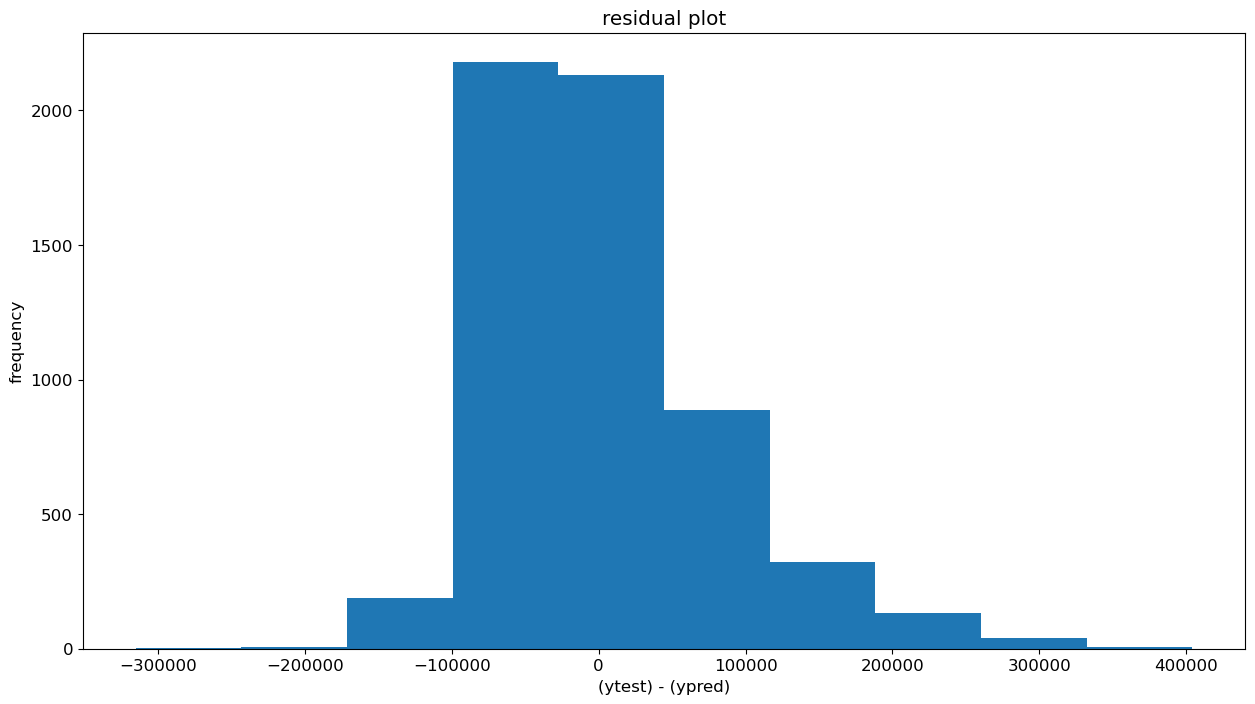

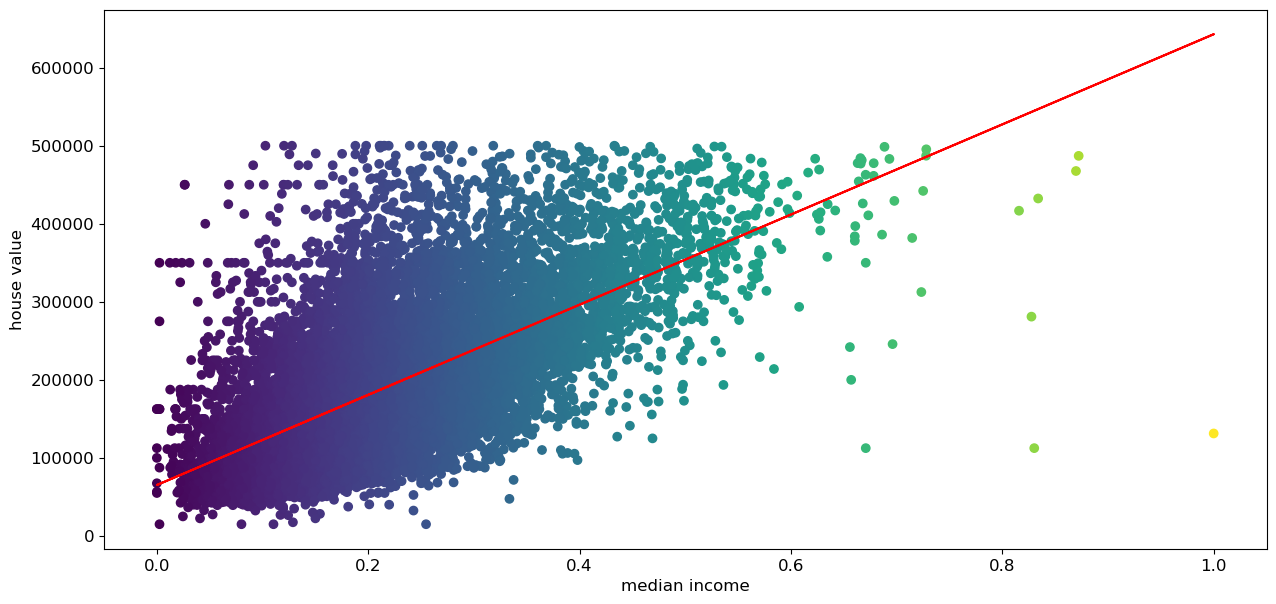

In [41]:
print('Linear regression with most co related features')
l=regresssor_model(xtrain[:,[11]],ytrain,LinearRegression)
evaluate(l.predict(xtest[:,[11]]),ytest,l)
plt.figure(figsize=(15,7))
plt.scatter(xtrain[:,11],ytrain,c=xtrain[:,11])
plt.plot(xtrain[:,11],l.predict(xtrain[:,11:12]),color='red')
plt.xlabel('median income')
plt.ylabel('house value')
plt.show()

### Linear regression  with all features

Linear regression with all features
The cross validated accuracy  - 63.228791930286434
The corss validated variance is - 1.8068043323178664
root mean squared error for test data   is 58738.52741996869


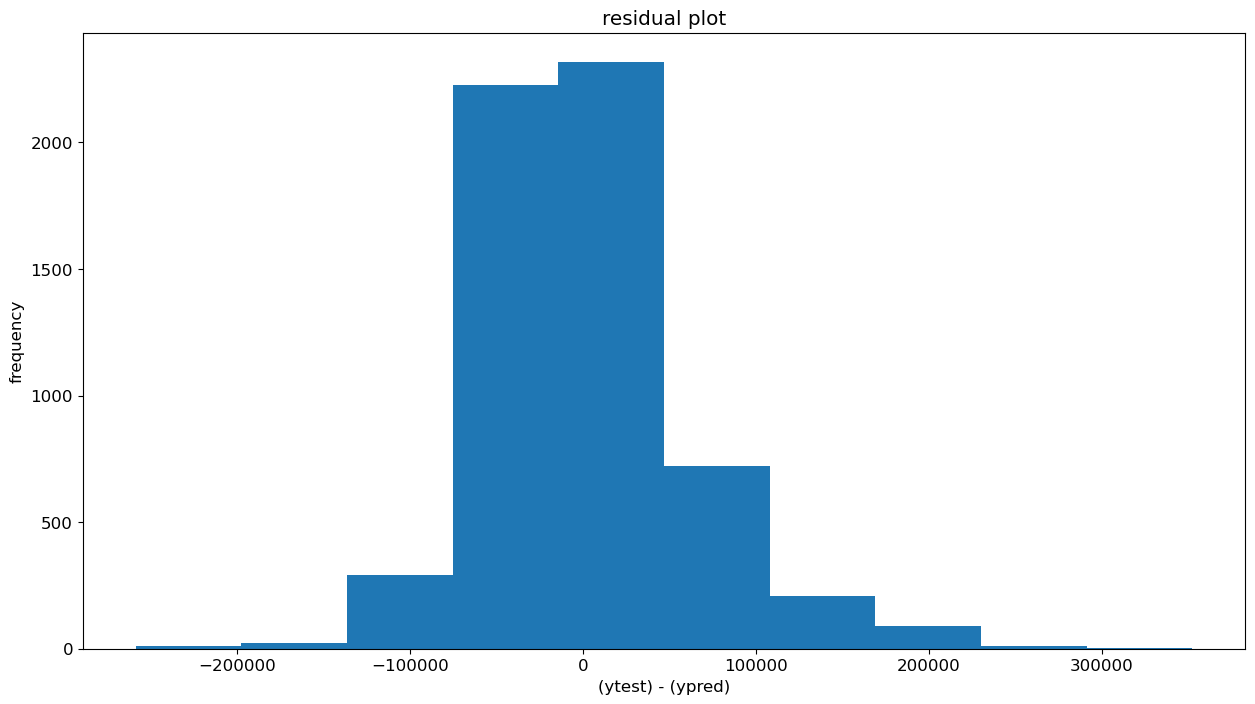

In [43]:
print('Linear regression with all features')
l=regresssor_model(xtrain,ytrain,LinearRegression)
evaluate(l.predict(xtest),ytest,l)

### Polynomial regression with most corelated features

The cross validated accuracy  - 41.350961353015485
The corss validated variance is - 1.8965677094607374
root mean squared error for test data   is 76253.76750278793


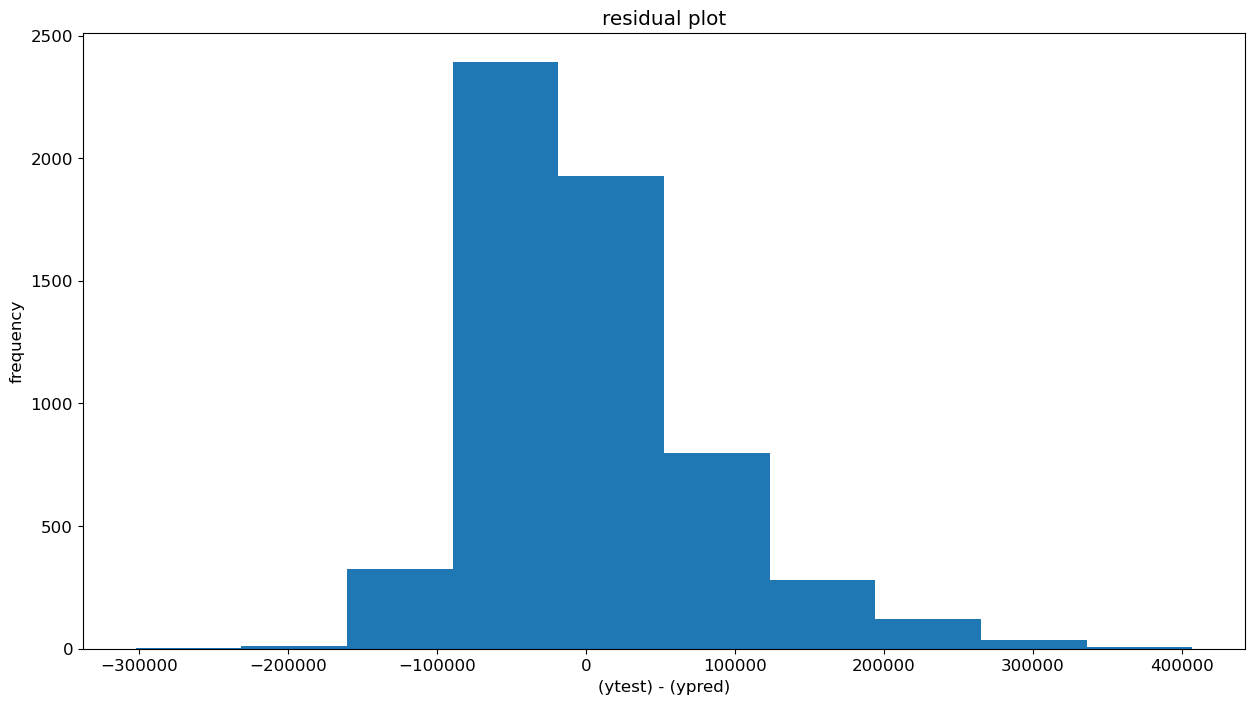

In [44]:
xtrain_poly,xtest_poly=to_poly(2,xtrain[:,11:12],xtest[:,11:12])
l=regresssor_model(xtrain_poly,ytrain,LinearRegression)
evaluate(l.predict(xtest_poly),ytest,l)

### Polynomial regression with all features

The cross validated accuracy  - -2.1045687612571066e+19
The corss validated variance is - 6.280798827123928e+19
root mean squared error for test data   is 202990640496.29202


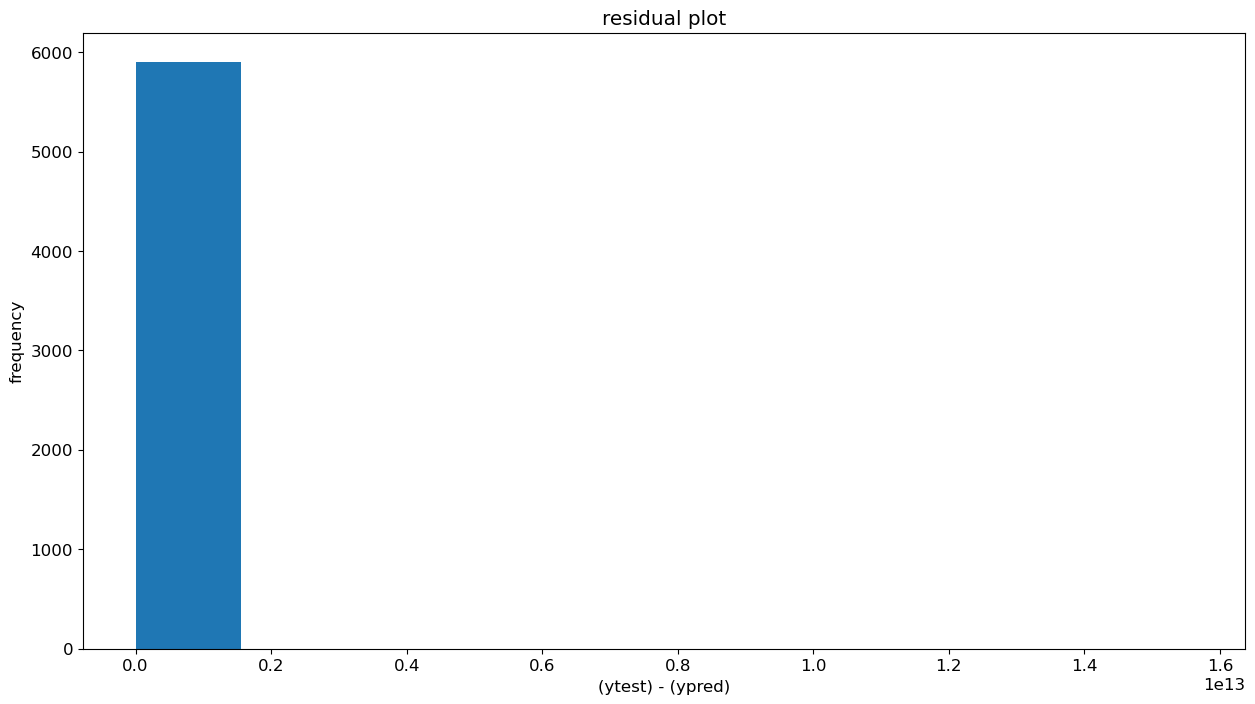

In [45]:
xtrain_poly,xtest_poly=to_poly(3,xtrain,xtest)
l=regresssor_model(xtrain_poly,ytrain,LinearRegression)
evaluate(l.predict(xtest_poly),ytest,l)

## Here we can see that polynomial model is having high variance and hence it's bad model

## Stepwise Regression (backward elimination)
- for 5% significance level 
- checking pvalues

In [112]:
xtrain_ols=np.append(np.ones(xtrain.shape[0]).reshape(xtrain.shape[0],1),xtrain,axis=1)

In [46]:
xtest_ols=np.append(np.ones(xtest.shape[0]).reshape(xtest.shape[0],1),xtest,axis=1)

#### Pvalues

In [ ]:
def backward_elimination(x,y_dependent,sl):
    var=np.arange(x.shape[1])
    x_ols_array=x[:,var]
    regressor=sm.OLS(y_dependent,x_ols_array).fit()
    for i in range(sum(regressor.pvalues>sl)):
        if sum(regressor.pvalues>sl)>0:
            arg=regressor.pvalues.argmax()
            var=np.delete(var,arg)
            x_ols_array=x[:,var]
            regressor=sm.OLS(y_dependent,x_ols_array).fit()
    return (var[:],regressor)

features,regressor=backward_elimination(x_ols_array,ytrain,0.10)

In [ ]:
features

In [ ]:
regressor.summary()

In [ ]:
np.sqrt(mean_squared_error(ytest,regressor.predict(xtest_ols[:,features])))

### Regularization

- Here  apply base l1 and l2 techniques to check the basic accuracy

### Coefficients comparison for linear regression

Text(0.5, 1.0, 'coeff graph')

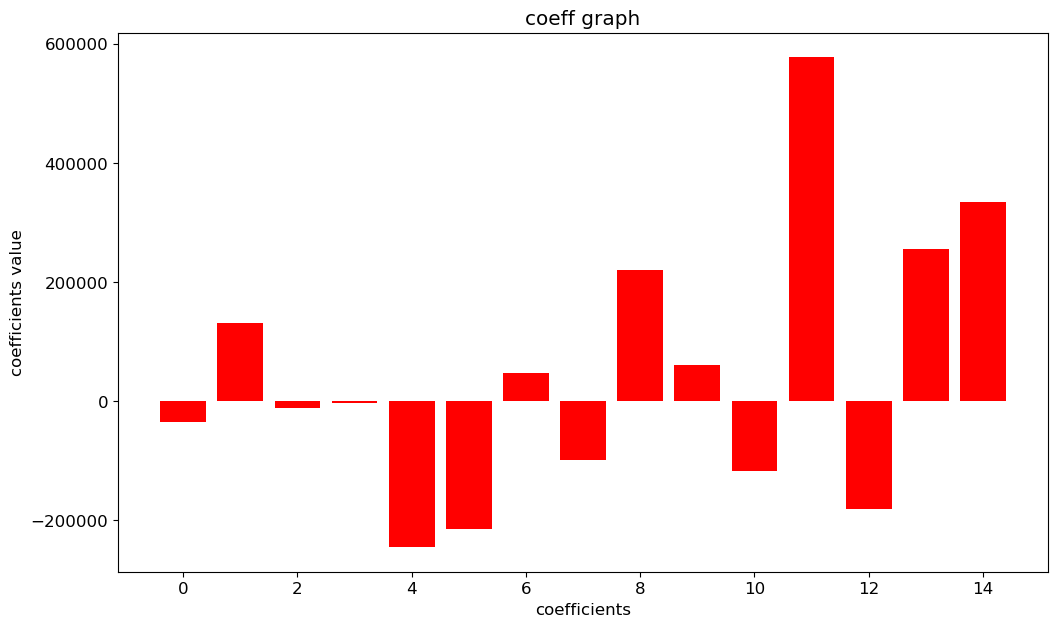

In [51]:
l=LinearRegression()
plt.figure(figsize=(12,7))
l.fit(xtrain,ytrain)
plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

### lasso

The cross validated accuracy  - 63.232694319850346
The corss validated variance is - 1.7999168186394052
root mean squared error for test data   is 58743.50415445193


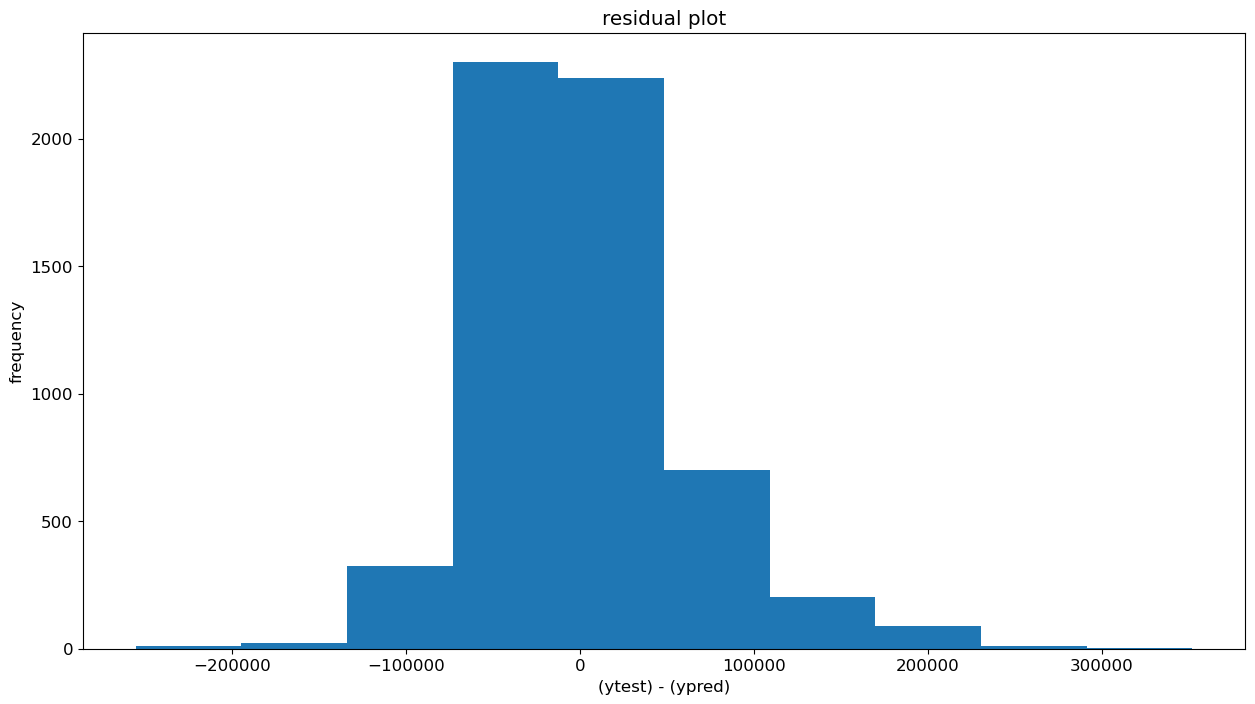

[]

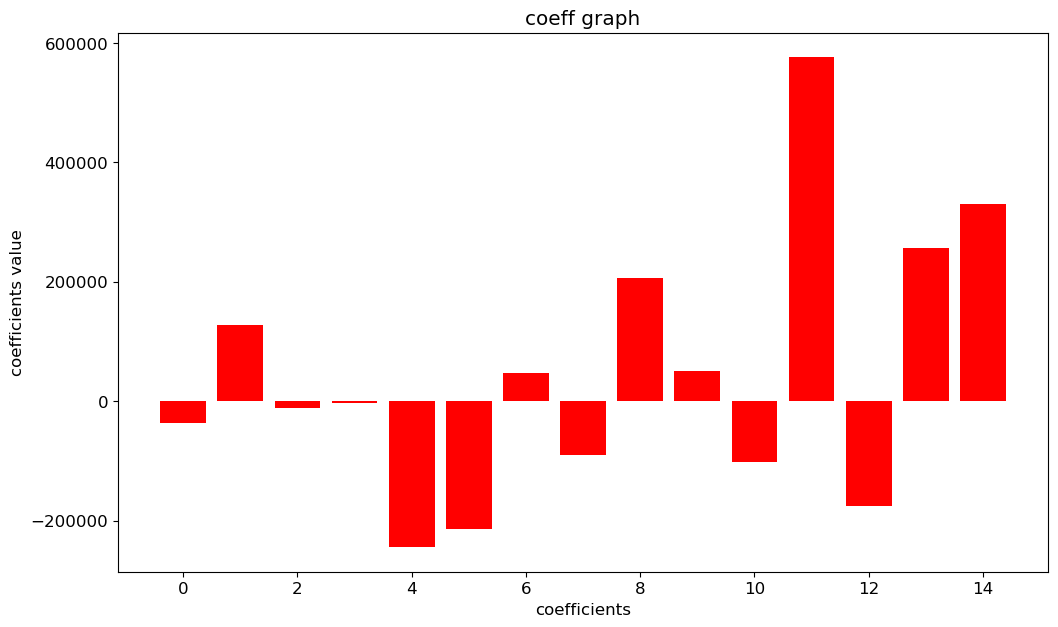

In [52]:
l=regresssor_model(xtrain,ytrain,Lasso)

evaluate(l.predict(xtest),ytest,l)
plt.figure(figsize=(12,7))

plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')
plt.plot()

### Elastic nets

The cross validated accuracy  - 15.147640718419304
The corss validated variance is - 0.5517758382319398
root mean squared error for test data   is 91409.91400230327


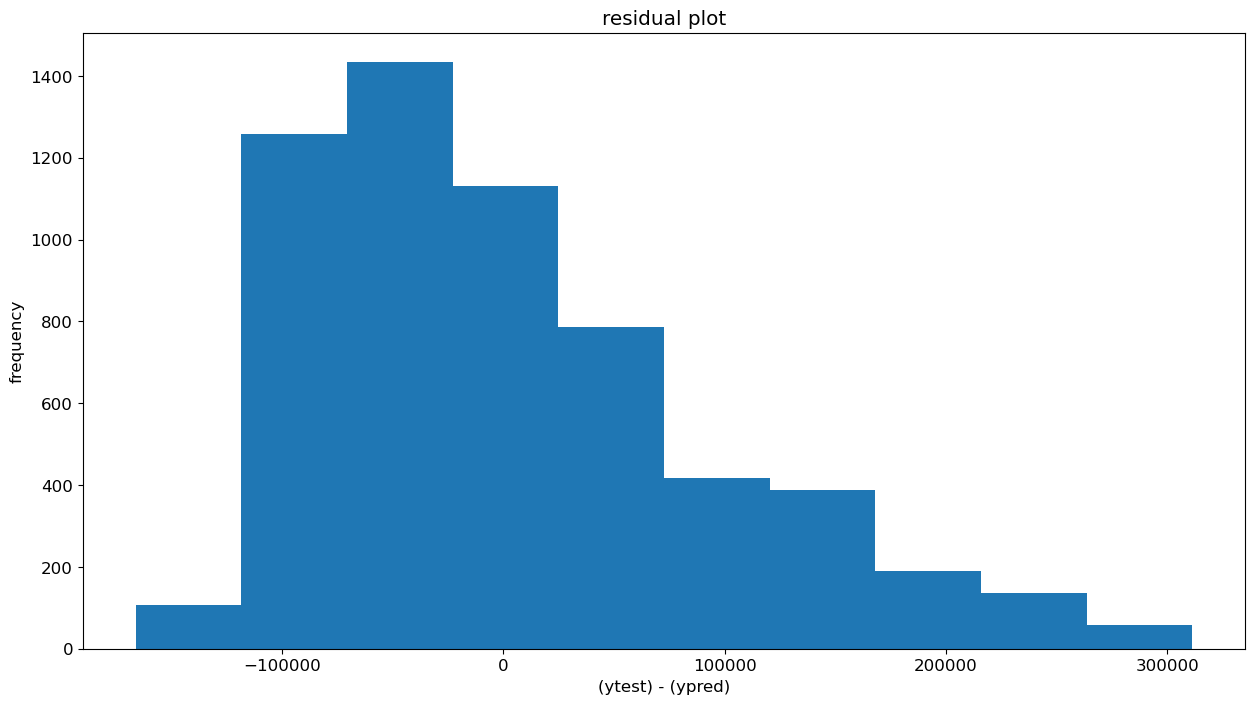

Text(0.5, 1.0, 'coeff graph')

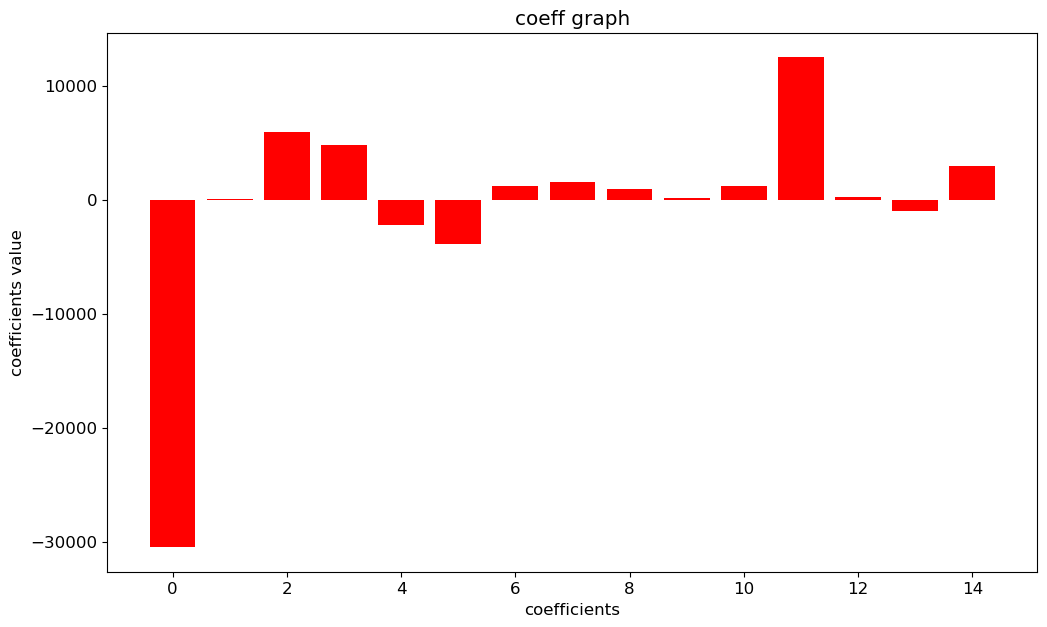

In [53]:
l=regresssor_model(xtrain,ytrain,ElasticNet)
evaluate(l.predict(xtest),ytest,l)
plt.figure(figsize=(12,7))
plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

## Ridge

The cross validated accuracy  - 63.31362788326456
The corss validated variance is - 1.5777132535327527
root mean squared error for test data   is 58857.78611996666


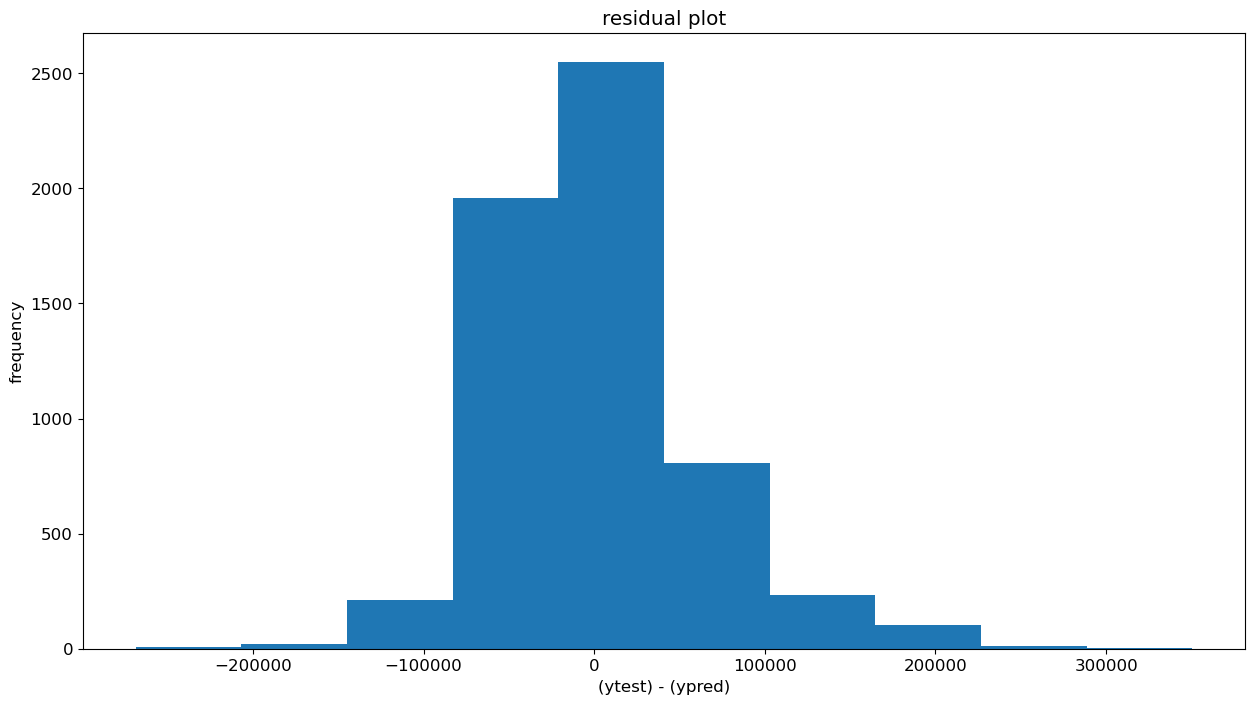

Text(0.5, 1.0, 'coeff graph')

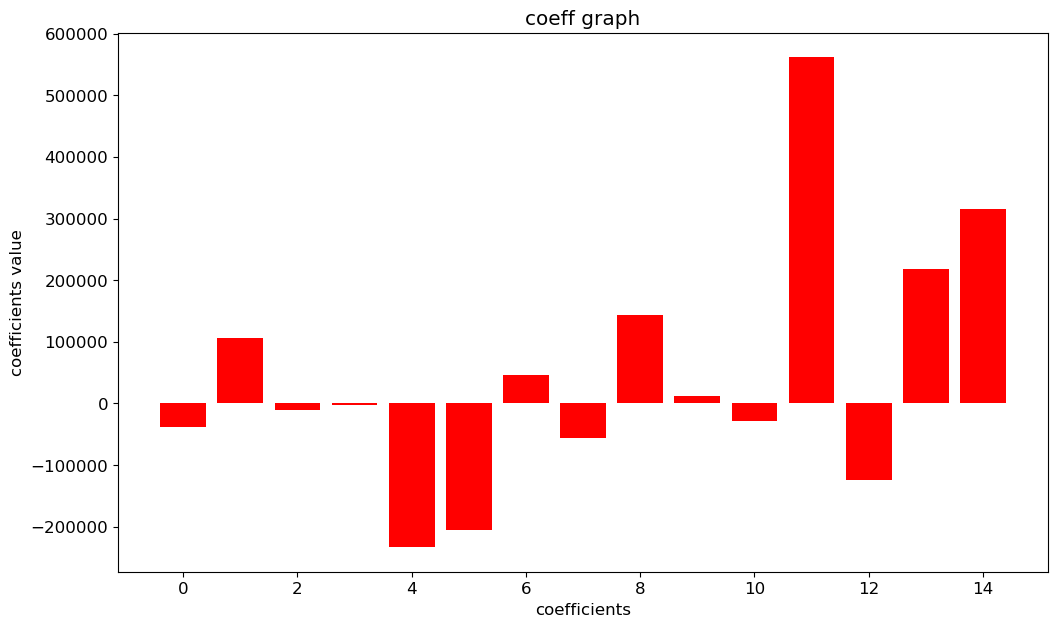

In [54]:
l=regresssor_model(xtrain,ytrain,Ridge)
evaluate(l.predict(xtest),ytest,l)
plt.figure(figsize=(12,7))
plt.bar(np.arange(len(l.coef_)),l.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

## CART TREES(Decision Trees)

In [55]:
dt=regresssor_model(xtrain,ytrain,DecisionTreeRegressor)
dt.fit(xtrain,ytrain)
print('mean squared errror is',end='\t-')
np.sqrt(mean_squared_error(ytest,dt.predict(xtest)))


The cross validated accuracy  - 54.53738928317164
The corss validated variance is - 3.989970276316616
mean squared errror is	-

65526.820871361175

### Cross Validation

In [56]:
cv=cross_val_score(dt,xtrain,ytrain,scoring='r2',cv=10)
cv.std()
cv.mean()

0.5443264848834394

### Parameter Tuning

In [57]:
params=[{
            
            'max_depth':[2,3,4,5,6,10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
            
        }
        ]

from sklearn.model_selection import GridSearchCV
gc=GridSearchCV(dt,params,cv=10,scoring='r2',n_jobs=-1)
gc.fit(xtrain,ytrain)
gc.best_estimator_

DecisionTreeRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=20,
                      min_samples_split=3)

In [58]:
gc.best_score_

0.6455857204445544

In [59]:
dt=gc.best_estimator_
dt.fit(xtrain,ytrain)
print('root mean squared error')
np.sqrt(mean_squared_error(ytest,dt.predict(xtest)))

root mean squared error


61675.19700145574

#### Feature Importance by decision trees 

Text(0.5, 1.0, 'feature importance')

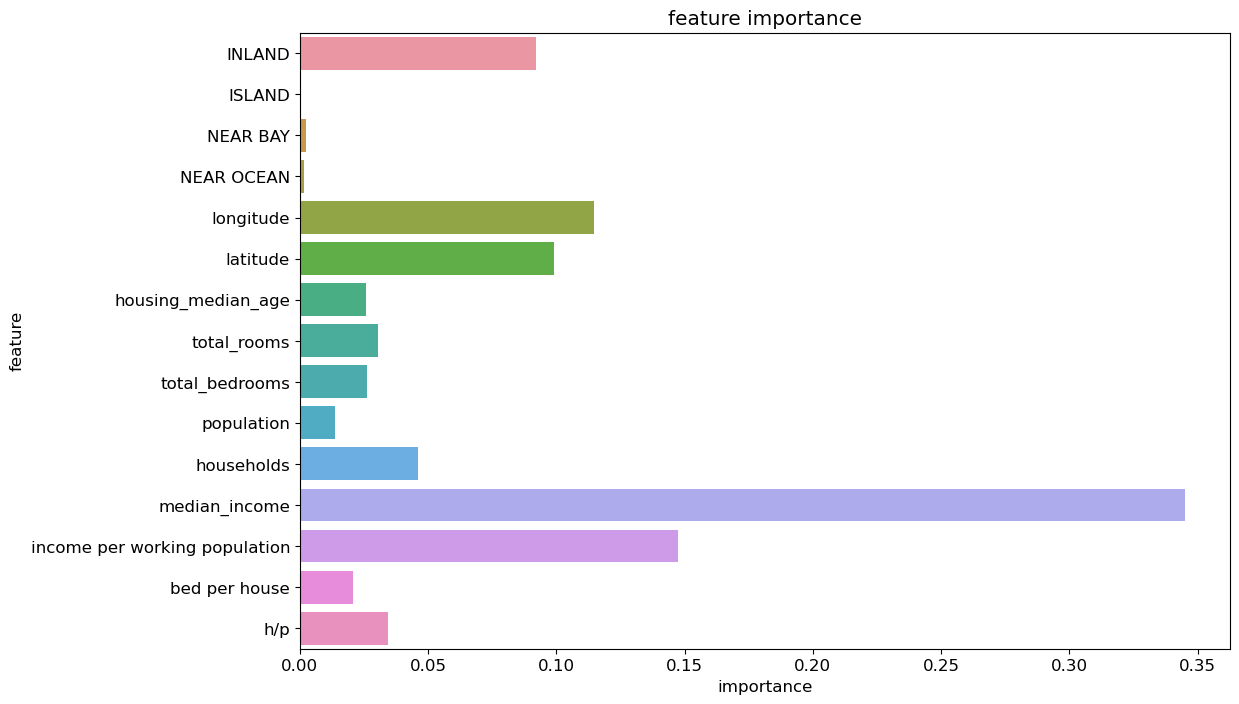

In [60]:
plt.figure(figsize=(12,8))
data=pd.DataFrame({'feature':df.columns[df.columns!='median_house_value'].values,"importance":dt.feature_importances_})
sns.barplot(data=data,y='feature',x='importance')
plt.title('feature importance')

### Esemble Learning 

### Random forest

In [61]:
rg=RandomForestRegressor(n_estimators=30)
rg.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=30)

Root mean square value

In [62]:
print(np.sqrt(mean_squared_error(ytest,rg.predict(xtest))))

46499.91364167677


R Squared

In [63]:
print(rg.score(xtest,ytest))

0.7806059957003137


(array([2.000e+00, 1.100e+01, 7.100e+01, 3.840e+02, 3.252e+03, 1.673e+03,
        3.540e+02, 1.210e+02, 2.400e+01, 1.000e+01]),
 array([-274050., -218346., -162642., -106938.,  -51234.,    4470.,
          60174.,  115878.,  171582.,  227286.,  282990.]),
 <BarContainer object of 10 artists>)

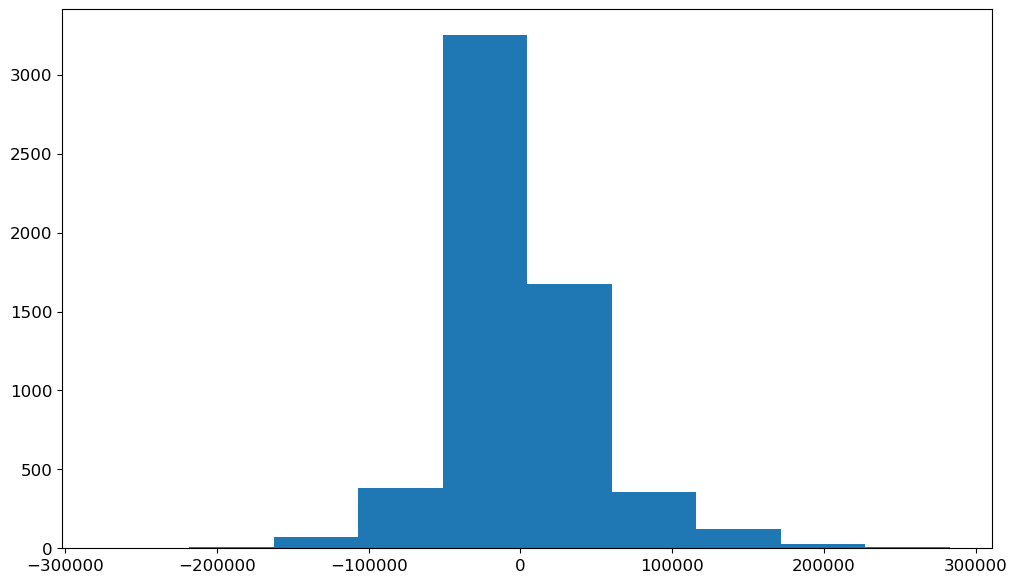

In [64]:
plt.figure(figsize=(12,7))
plt.hist(ytest-rg.predict(xtest))

### Grid Search

In [65]:
params=[{
            'n_estimators':[20,30,70,50,100,200,300,400,600,650,630,680],
            'max_depth':[10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,5,10],
            'min_samples_leaf' :[1,2,5,7,10],
            'bootstrap':[True,False],
            'max_features':['sqrt','auto']
            
            
        }
]

In [117]:
# gc=GridSearchCV(rg,params,cv=2,scoring='r2')
# gc.fit(xtrain,ytrain)


### Model with Best HyperParameter

In [66]:
rg=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=70,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=1,
           oob_score=False, verbose=0, warm_start=False)
rg.fit(xtrain,ytrain)
np.sqrt(mean_squared_error(ytest,rg.predict(xtest)))

TypeError: __init__() got an unexpected keyword argument 'min_impurity_split'

Root Mean Sqared Error

In [ ]:
np.sqrt(mean_squared_error(ytest,rg.predict(xtest)))

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Residual Plot')
plt.hist(ytest-rg.predict(xtest))
plt.show()

R Squared

In [ ]:
rg.score(xtest,ytest)

dd

### Best Featureby Random Forest

In [122]:
plt.figure(figsize=(12,8))
plt.title('Feature Importance')

sns.barplot(data={'importance':rg.feature_importances_,'feature':df.columns[df.columns!='median_house_value']},y='feature',x='importance')

In [ ]:
rg=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=100,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=630, n_jobs=1,
           oob_score=False, verbose=0, warm_start=False)
rg.fit(xtrain[:,[0,4,5,6,7,11,12,13,14]],ytrain)
print('rmse value is '+str(np.sqrt(mean_squared_error(ytest,rg.predict(xtest[:,[0,4,5,6,7,11,12,13,14]])))))
print('r squared value is '+str(rg.score(xtest[:,[0,4,5,6,7,11,12,13,14]],ytest)))

plt.figure(figsize=(12,7))
plt.title('Residual Plot')
plt.hist(ytest-rg.predict(xtest[:,[0,4,5,6,7,11,12,13,14]]))
plt.show()

## Fitting  Random forest with best feature and visualizing

In [ ]:
rg=RandomForestRegressor(n_estimators=400)
rg.fit(xtrain[:,11:12],ytrain)

In [ ]:
x_t=np.arange(min(xtest[:,11]),max(xtest[:,11]),0.005)
x_t=x_t.reshape(len(x_t),1)


In [1]:
plt.figure(figsize=(12,8))
plt.xlabel("best feature")
plt.ylabel("median house value")
plt.plot(x_t,rg.predict(x_t))

NameError: name 'plt' is not defined

Hence we can conclude that Random forest could be the best model because of low mean squred error(root) and high r squared
